<a href="https://colab.research.google.com/github/Rizwanhu/Weather-Data-Analysis-Project/blob/main/ML_Weather_Pattren_data_analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime


cities = pd.read_csv('pakistan_cities.csv')
cities.tail()

,City,Province,Country
142,Nasirabad,Balochistan,Pakistan
143,Tump,Balochistan,Pakistan
144,Kahan,Balochistan,Pakistan
145,Shahdadkot,Balochistan,Pakistan
146,Ormara,Balochistan,Pakistan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

api_key = "b2223cfc3c634eb89cd438e854445d89"

weather_data = []

for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']
    # Include the country in the query
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric'

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()

        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description']
        #country = data['sys']['country']
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        weather_data.append({
            'Country': country,
            'Province':province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': desc.capitalize(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    else:
        weather_data.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

weather_df = pd.DataFrame(weather_data)

In [ ]:
weather_df.to_csv('pakistan_weather_data.csv', index=False)

print(weather_df)
weather_df.head()

      Country     Province        City  Temperature  Feels_Like  Min_Temp  \
0    Pakistan        Sindh     Karachi        30.90       33.48     30.90   
1    Pakistan        Sindh   Hyderabad        23.49       23.54     23.49   
2    Pakistan        Sindh      Sukkur        34.86       32.59     34.86   
3    Pakistan        Sindh     Larkana        33.92       31.53     33.92   
4         NaN          NaN  Mirpurkhas          NaN         NaN       NaN   
..        ...          ...         ...          ...         ...       ...   
142  Pakistan  Balochistan   Nasirabad        27.85       26.86     27.85   
143       NaN          NaN        Tump          NaN         NaN       NaN   
144  Pakistan  Balochistan       Kahan         8.60        6.82      8.60   
145  Pakistan  Balochistan  Shahdadkot        32.20       30.07     32.20   
146  Pakistan  Balochistan      Ormara        28.90       33.25     28.90   

     Max_Temp  Humidity  Pressure  Wind_Speed  Cloudiness       Description

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,30.90,33.48,30.90,30.90,55.0,1008.0,3.09,16.0,Few clouds,67.0822,24.9056,01:35 AM,12:54 PM,NaN
1,Pakistan,Sindh,Hyderabad,23.49,23.54,23.49,23.49,63.0,1010.0,2.61,31.0,Scattered clouds,78.4744,17.3753,12:42 AM,12:17 PM,NaN
2,Pakistan,Sindh,Sukkur,34.86,32.59,34.86,34.86,17.0,1005.0,3.03,4.0,Clear sky,68.8574,27.7052,01:31 AM,12:44 PM,NaN
3,Pakistan,Sindh,Larkana,33.92,31.53,33.92,33.92,15.0,1005.0,1.83,4.0,Clear sky,68.2141,27.5551,01:34 AM,12:47 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404


In [4]:
import pandas as pd
import plotly.graph_objects as go

# Load the city data
cities_df = pd.read_csv('pakistan_cities.csv')

# Group data by 'Province' and 'Country' to see city counts per province and country
province_country_counts = cities_df.groupby(['Province', 'Country']).size().reset_index(name='City_Count')

# Prepare data for the Sankey diagram
source = province_country_counts['Province']
target = province_country_counts['Country']
values = province_country_counts['City_Count']

# Encode categories as indices
labels = list(set(source) | set(target))  # Unique province and country names
label_to_index = {label: idx for idx, label in enumerate(labels)}
source_indices = [label_to_index[province] for province in source]
target_indices = [label_to_index[country] for country in target]

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

# Update layout and show figure
fig.update_layout(title_text="City Distribution across Provinces and Countries in Pakistan", font_size=10)
fig.show()


In [7]:
import pandas as pd

# Load the CSV file
weather_df = pd.read_csv('pakistan_cities.csv')

# Display the column names to check if 'Temperature' and other weather-related columns exist
print(weather_df.columns)


Index(['City', 'Province', 'Country'], dtype='object')


In [10]:
import pandas as pd
import plotly.graph_objects as go
import requests
from datetime import datetime

cities = pd.read_csv('pakistan_cities.csv')

api_key = "b2223cfc3c634eb89cd438e854445d89"

weather_data = []
for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']
    province = row['Province']

    url = f'http://api.openweathermap.org/data/2.5/weather?q={city},{country}&appid={api_key}&units=metric'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description'].capitalize()

        weather_data.append({
            'Province': province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Description': desc
        })
    else:
        print(f"Error fetching data for {city}: {response.status_code}")

weather_df = pd.DataFrame(weather_data)

sankey_figures = []

for province in weather_df['Province'].unique():
    province_data = weather_df[weather_df['Province'] == province]

    source = [province] * len(province_data)
    target = province_data['City'].tolist()
    values = [1] * len(province_data)

    labels = [province] + target
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    source_indices = [label_to_index[province] for _ in source]
    target_indices = [label_to_index[city] for city in target]

    customdata = [
        [
            f"Temperature: {row['Temperature']}°C",
            f"Feels Like: {row['Feels_Like']}°C",
            f"Humidity: {row['Humidity']}%",
            f"Pressure: {row['Pressure']} hPa",
            f"Wind Speed: {row['Wind_Speed']} m/s",
            f"Description: {row['Description']}"
        ]
        for _, row in province_data.iterrows()
    ]

    hovertemplate = "<br>".join([
        "City: %{target.label}",
        "%{customdata[0]}",
        "%{customdata[1]}",
        "%{customdata[2]}",
        "%{customdata[3]}",
        "%{customdata[4]}",
        "%{customdata[5]}",
    ])

    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            color="blue"  # Adjust color as desired
        ),
        link=dict(
            source=source_indices,
            target=target_indices,
            value=values,
            customdata=customdata,
            hovertemplate=hovertemplate
        )
    )])

    fig.update_layout(title_text=f"Weather Data for Cities in {province}", font_size=10)
    sankey_figures.append(fig)

# Display each Sankey diagram
for fig in sankey_figures:
    fig.show()


Error fetching data for Mirpurkhas: 404
Error fetching data for Tharparkar: 404
Error fetching data for Naushahro Feroze: 404
Error fetching data for Chachro: 404
Error fetching data for Mirpur Bathoro: 404
Error fetching data for Rahim Yar Khan: 404
Error fetching data for Jehlum: 404
Error fetching data for Swat: 404
Error fetching data for Batkhela: 404
Error fetching data for Buner: 404
Error fetching data for Shangla: 404
Error fetching data for Lower Dir: 404
Error fetching data for Kurram: 404
Error fetching data for Orakzai: 404
Error fetching data for North Waziristan: 404
Error fetching data for South Waziristan: 404
Error fetching data for Takht Bhai: 404
Error fetching data for Jamrud: 404
Error fetching data for Lasbela: 404
Error fetching data for Jaffarabad: 404
Error fetching data for Killa Abdullah: 404
Error fetching data for Killa Saifullah: 404
Error fetching data for Jhal Magsi: 404
Error fetching data for Ghanche: 404
Error fetching data for Musa Khel: 404
Error f

In [ ]:
df = pd.read_csv('pakistan_weather_data.csv')
df.head(10)

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,30.90,33.48,30.90,30.90,55.0,1008.0,3.09,16.0,Few clouds,67.0822,24.9056,01:35 AM,12:54 PM,NaN
1,Pakistan,Sindh,Hyderabad,23.49,23.54,23.49,23.49,63.0,1010.0,2.61,31.0,Scattered clouds,78.4744,17.3753,12:42 AM,12:17 PM,NaN
2,Pakistan,Sindh,Sukkur,34.86,32.59,34.86,34.86,17.0,1005.0,3.03,4.0,Clear sky,68.8574,27.7052,01:31 AM,12:44 PM,NaN
3,Pakistan,Sindh,Larkana,33.92,31.53,33.92,33.92,15.0,1005.0,1.83,4.0,Clear sky,68.2141,27.5551,01:34 AM,12:47 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
5,Pakistan,Sindh,Nawabshah,34.40,32.12,34.40,34.40,17.0,1005.0,1.39,32.0,Scattered clouds,68.4096,26.2483,01:32 AM,12:48 PM,NaN
6,Pakistan,Sindh,Jacobabad,31.95,29.88,31.95,31.95,19.0,1005.0,1.82,2.0,Clear sky,68.4388,28.2810,01:34 AM,12:45 PM,NaN
7,Pakistan,Sindh,Dadu,34.87,32.45,34.87,34.87,15.0,1005.0,2.68,15.0,Few clouds,67.7763,26.7329,01:35 AM,12:50 PM,NaN
8,Pakistan,Sindh,Thatta,29.17,31.16,29.17,29.17,59.0,1007.0,5.14,10.0,Clear sky,67.9235,24.7475,01:32 AM,12:51 PM,NaN
9,Pakistan,Sindh,Badin,32.57,32.21,32.57,32.57,35.0,1007.0,4.54,7.0,Clear sky,68.8384,24.6560,01:28 AM,12:48 PM,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      118 non-null    object 
 1   Province     118 non-null    object 
 2   City         147 non-null    object 
 3   Temperature  118 non-null    float64
 4   Feels_Like   118 non-null    float64
 5   Min_Temp     118 non-null    float64
 6   Max_Temp     118 non-null    float64
 7   Humidity     118 non-null    float64
 8   Pressure     118 non-null    float64
 9   Wind_Speed   118 non-null    float64
 10  Cloudiness   118 non-null    float64
 11  Description  118 non-null    object 
 12  Longitude    118 non-null    float64
 13  Latitude     118 non-null    float64
 14  Sunrise      118 non-null    object 
 15  Sunset       118 non-null    object 
 16  Error        29 non-null     object 
dtypes: float64(10), object(7)
memory usage: 19.6+ KB


In [ ]:
df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,27.622881,26.611610,27.583051,27.650339,30.745763,1008.279661,2.784153,20.932203,68.865442,29.756936
std,5.538022,5.457418,5.565703,5.505464,16.474890,3.822751,1.606341,33.412401,12.564892,5.103704
min,8.600000,6.820000,8.600000,8.600000,15.000000,1005.000000,0.000000,0.000000,-9.569000,8.518500
25%,24.850000,24.160000,24.680000,24.850000,20.250000,1006.000000,1.822500,1.000000,68.239900,27.177450
50%,28.430000,27.500000,28.430000,28.430000,24.500000,1007.000000,2.555000,4.000000,70.618750,30.246500
75%,32.187500,30.725000,32.187500,32.187500,33.750000,1009.000000,3.525000,26.250000,72.690000,32.095900
max,34.870000,34.120000,34.870000,34.870000,91.000000,1024.000000,7.880000,100.000000,117.789200,51.445000


In [ ]:
df['City'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Nawabshah', 'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur',
       'Khairpur', 'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot',
       'Jamshoro', 'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot',
       'Tharparkar', 'Hala', 'Naushahro Feroze', 'Samaro', 'Chachro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Mirpur Bathoro',
       'Daro', 'Daur', 'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann',
       'Khipro', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Multan',
       'Gujranwala', 'Sialkot', 'Bahawalpur', 'Rahim Yar Khan',
       'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara', 'Sahiwal',
       'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot', 'Narowal',
       'Jehlum', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Jalalpur Bhattian', 'Kha

In [ ]:
df['Description'].value_counts()

,count
Description,
Clear sky,81
Overcast clouds,15
Scattered clouds,7
Broken clouds,7
Few clouds,4
Haze,2
Smoke,2


In [ ]:
columns_to_drop = ['Unnamed: 0', 'Error']
existing_columns = [col for col in columns_to_drop if col in df.columns]

if existing_columns:
    df.drop(columns=existing_columns, inplace=True)


In [ ]:
print(df.isnull().sum())

df.dropna(inplace=True)


Country        0
Province       0
City           0
Temperature    0
Feels_Like     0
Min_Temp       0
Max_Temp       0
Humidity       0
Pressure       0
Wind_Speed     0
Cloudiness     0
Description    0
Longitude      0
Latitude       0
Sunrise        0
Sunset         0
dtype: int64


In [ ]:
df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset
0,Pakistan,Sindh,Karachi,30.90,33.48,30.90,30.90,55.0,1008.0,3.09,16.0,Few clouds,67.0822,24.9056,01:35 AM,12:54 PM
1,Pakistan,Sindh,Hyderabad,23.49,23.54,23.49,23.49,63.0,1010.0,2.61,31.0,Scattered clouds,78.4744,17.3753,12:42 AM,12:17 PM
2,Pakistan,Sindh,Sukkur,34.86,32.59,34.86,34.86,17.0,1005.0,3.03,4.0,Clear sky,68.8574,27.7052,01:31 AM,12:44 PM
3,Pakistan,Sindh,Larkana,33.92,31.53,33.92,33.92,15.0,1005.0,1.83,4.0,Clear sky,68.2141,27.5551,01:34 AM,12:47 PM
5,Pakistan,Sindh,Nawabshah,34.40,32.12,34.40,34.40,17.0,1005.0,1.39,32.0,Scattered clouds,68.4096,26.2483,01:32 AM,12:48 PM


In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.columns

Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset'],
      dtype='object')

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

<ipython-input-27-898af62091db>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
<ipython-input-27-898af62091db>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')


In [ ]:
df.head()

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,30.90,33.48,30.90,30.90,55.0,1008.0,3.09,16.0,Few clouds,67.0822,24.9056,2024-10-27 01:35:00,2024-10-27 12:54:00
1,Pakistan,Sindh,Hyderabad,23.49,23.54,23.49,23.49,63.0,1010.0,2.61,31.0,Scattered clouds,78.4744,17.3753,2024-10-27 00:42:00,2024-10-27 12:17:00
2,Pakistan,Sindh,Sukkur,34.86,32.59,34.86,34.86,17.0,1005.0,3.03,4.0,Clear sky,68.8574,27.7052,2024-10-27 01:31:00,2024-10-27 12:44:00
3,Pakistan,Sindh,Larkana,33.92,31.53,33.92,33.92,15.0,1005.0,1.83,4.0,Clear sky,68.2141,27.5551,2024-10-27 01:34:00,2024-10-27 12:47:00
5,Pakistan,Sindh,Nawabshah,34.40,32.12,34.40,34.40,17.0,1005.0,1.39,32.0,Scattered clouds,68.4096,26.2483,2024-10-27 01:32:00,2024-10-27 12:48:00


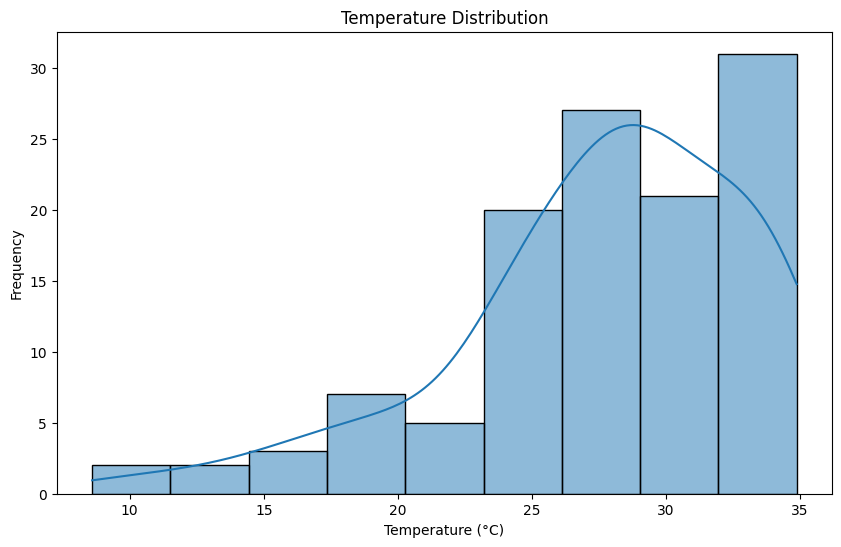

In [ ]:
# Use histograms and boxplots to understand the distribution of variables like Temperature, Humidity, etc.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



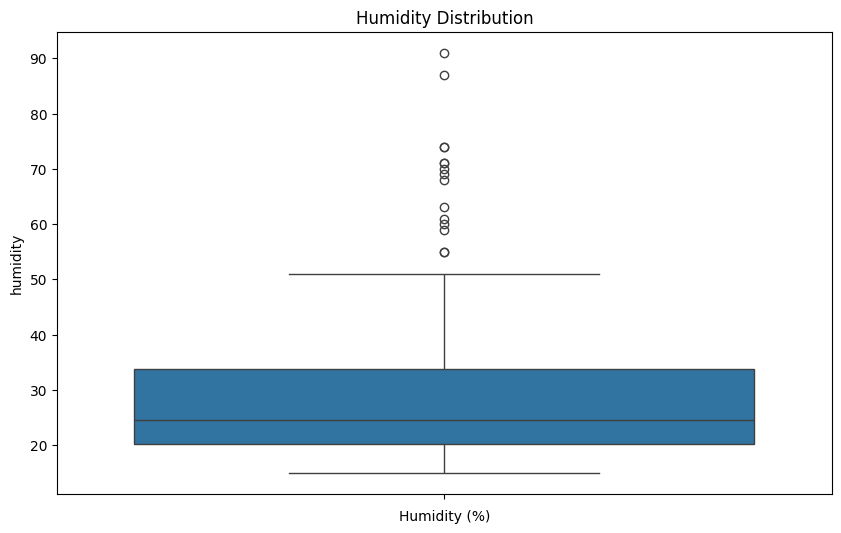

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(df['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()


In [ ]:
city_province_group = df.groupby(['province', 'city']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'cloudiness': 'mean'
}).reset_index()


print(city_province_group)

        province            city  temperature  humidity  wind_speed  \
0    Balochistan          Awaran        32.34      15.0        5.72   
1    Balochistan         Barkhan        25.25      18.0        2.35   
2    Balochistan            Bela        26.56      70.0        1.98   
3    Balochistan          Chaman        19.93      27.0        1.14   
4    Balochistan       Dalbandin        25.96      22.0        2.27   
..           ...             ...          ...       ...         ...   
113        Sindh          Sukkur        34.86      17.0        3.03   
114        Sindh      Tando Adam        34.23      30.0        7.88   
115        Sindh  Tando Allahyar        34.18      31.0        6.36   
116        Sindh          Thatta        29.17      59.0        5.14   
117        Sindh         Umerkot        21.19      91.0        1.12   

     cloudiness  
0           5.0  
1           2.0  
2          57.0  
3           1.0  
4           0.0  
..          ...  
113         4.0  
114

In [ ]:

top_cities = city_province_group.sort_values(by='temperature', ascending=False).head(20)

print(top_cities)

               province            city  temperature  humidity  wind_speed  \
86                Sindh            Dadu        34.87      15.0        2.68   
113               Sindh          Sukkur        34.86      17.0        3.03   
109               Sindh            Sann        34.83      16.0        2.44   
104               Sindh     Pir Jo Goth        34.55      17.0        2.83   
101               Sindh         Matiari        34.47      31.0        7.53   
102               Sindh       Nawabshah        34.40      17.0        1.39   
114               Sindh      Tando Adam        34.23      30.0        7.88   
96                Sindh        Khairpur        34.23      18.0        2.75   
108               Sindh         Sanghar        34.20      23.0        5.95   
115               Sindh  Tando Allahyar        34.18      31.0        6.36   
103               Sindh       Pano Aqil        34.14      18.0        2.46   
88                Sindh            Daur        34.09      17.0  

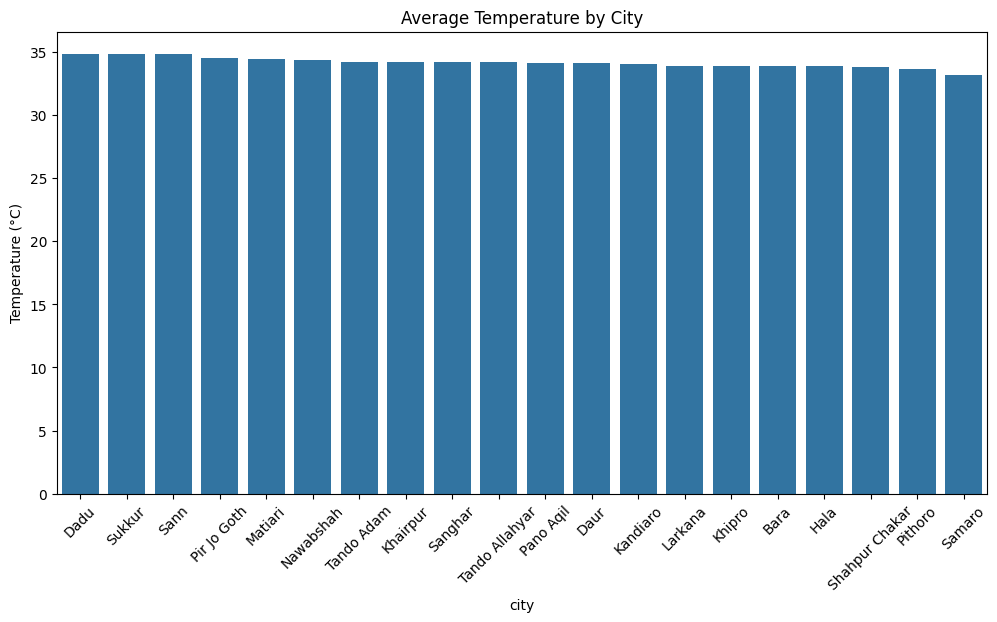

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='temperature', data=top_cities)
plt.title('Average Temperature by City')
plt.xticks(rotation=45)
plt.ylabel('Temperature (°C)')
plt.show()

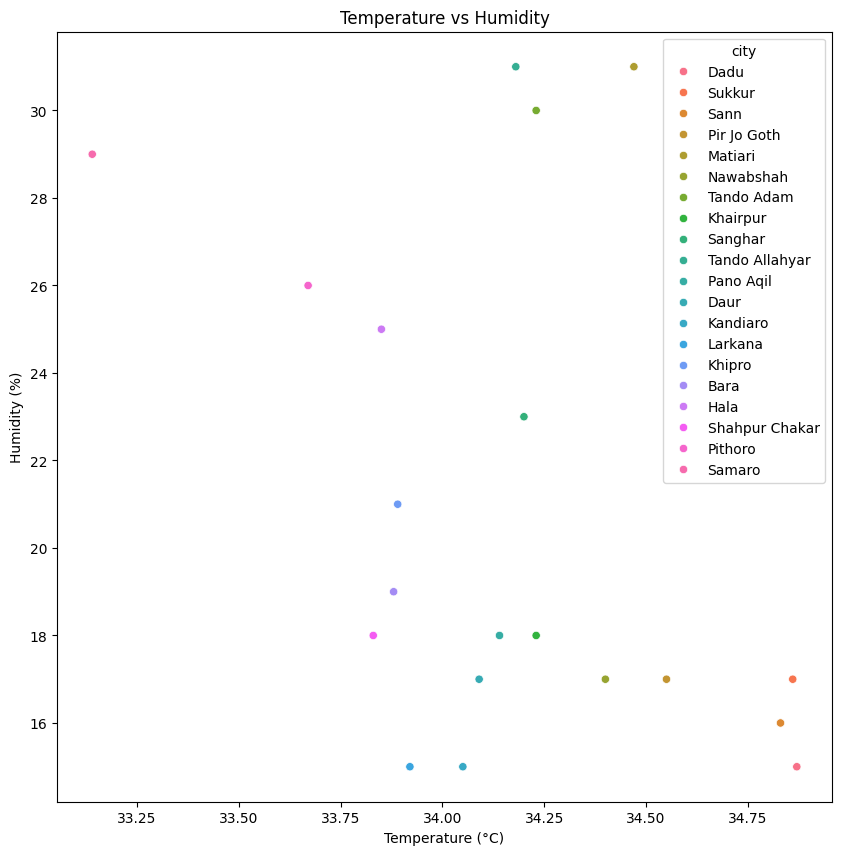

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='temperature', y='humidity', data=top_cities, hue='city')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

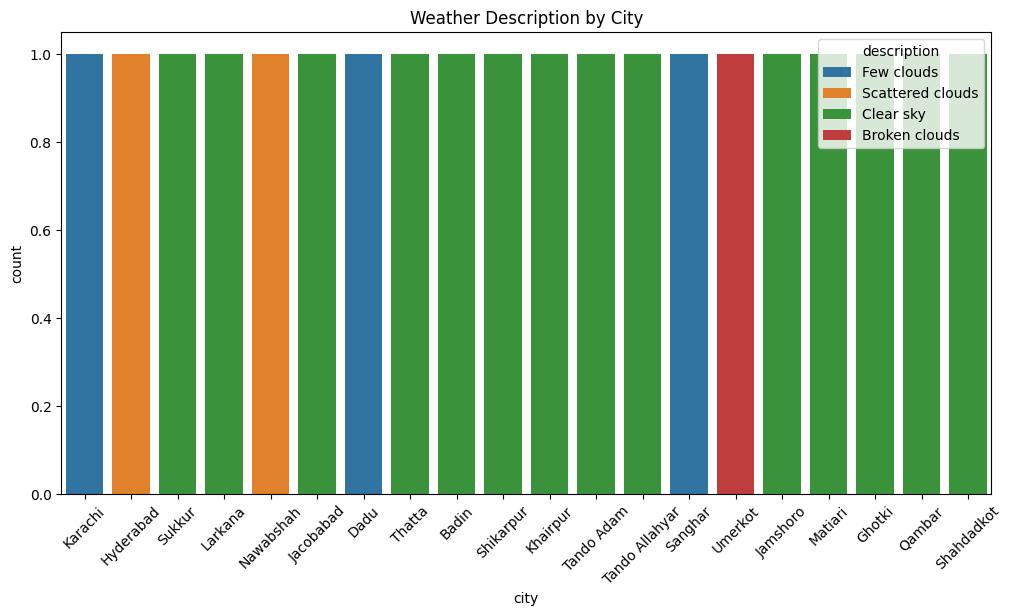

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='description', data=df.head(20))
plt.title('Weather Description by City')
plt.xticks(rotation=45)
plt.show()